## Baseline score -  randomly guessing given that we know that 20% of the data is popular

In [270]:
import random
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)
np.set_printoptions(suppress=True)

In [244]:
def randomly_guessing(n_simulations = 10):
    
    count = 0 #
    #keep track of 
    accuracy_baseline = np.zeros(shape=(1,9*n_simulations)) #we have 9 test sets for 2017. Multiply by 9 for each simulation.  
    recall_baseline = np.zeros(shape=(1,9*n_simulations))
    precision_baseline = np.zeros(shape=(1,9*n_simulations))
    f1_baseline = np.zeros(shape=(1,9*n_simulations))
    
    for i in range(n_simulations):
        my_list = [True for x in range(2)] +  [False for x in range(8)]
        start_month = 1
        end_month = 4
        while end_month <13:
            y_test = df_sf_2017[df_sf_2017['month'] == end_month]['popular']
            y_pred = pd.Series(random.choice(my_list) for x in range(y_test.size))
            accuracy_baseline[0][count] = accuracy_score(y_test, y_pred)
            recall_baseline[0][count] = recall_score(y_test, y_pred)
            precision_baseline[0][count] = precision_score(y_test, y_pred)
            f1_baseline[0][count] = f1_score(y_test, y_pred)
            count+=1
            start_month += 1
            end_month += 1
            
    return accuracy_baseline, recall_baseline, precision_baseline, f1_baseline


In [235]:
accuracy_baseline, recall_baseline, precision_baseline, f1_baseline = randomly_guessing(n_simulations = 1000)
print(accuracy_baseline.mean())
print(recall_baseline.mean()) 
print(precision_baseline.mean()) 
print(f1_baseline.mean())

0.6738568003192421
0.19992382244534446
0.2098987145097955
0.20396154681655437


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Load data

In [9]:
# df_sf_2017 = pickle.load(open('../data_sf_2017.p', 'rb'))

In [245]:
df_sf_2017 = pd.read_json('df_sf_2017')

In [11]:
len(df_sf_2017)

117262

# NLP

In [246]:
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import time
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [247]:
df_sf_2017.description.fillna(value='None', inplace=True)

In [248]:
df_sf_2017["description_new"] = df_sf_2017['description'].str.replace('[^\w\s]','')

## Test

In [181]:
test1 = df_sf_2017['description'].iloc[0:2]

In [200]:
# import string 
# def remove_punctuations(text):
#     return text.translate(None,string.punctuation)


In [177]:
# punc = RegexpTokenizer(r'\w+')

In [225]:
# token_pattern = r'\w+'

In [213]:
testing = df_sf_2017['description_new'].iloc[1:3]
tf_vectorizer_train = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', token_pattern = r'\w+').fit(testing)

In [215]:
tf_vectorizer_train.vocabulary_

{'floor': 30,
 'breath': 15,
 'taking': 86,
 'view': 96,
 'easy': 25,
 'transportation': 91,
 'downtown': 24,
 'great': 35,
 'neighborhood': 55,
 'san': 76,
 'francisco': 31,
 'safe': 75,
 'free': 32,
 'parking': 59,
 'located': 46,
 'geographically': 34,
 'center': 17,
 'city': 18,
 'public': 68,
 'available': 10,
 '15': 1,
 'minute': 51,
 'private': 67,
 'bathroom': 11,
 'room': 74,
 'street': 83,
 'lovely': 48,
 'noe': 57,
 'valley': 94,
 'access': 5,
 'muni': 54,
 'market': 49,
 'perfectly': 63,
 'enjoy': 26,
 'peaceful': 61,
 'environment': 28,
 'want': 97,
 'close': 20,
 'shopping': 81,
 'restaurant': 72,
 'nightlife': 56,
 'block': 14,
 'j': 41,
 'train': 90,
 '20m': 3,
 'ride': 73,
 '3': 4,
 'mission': 52,
 'apartment': 8,
 '2': 2,
 'bedroom': 12,
 '1': 0,
 'recently': 70,
 'remodeled': 71,
 'modern': 53,
 'kitchen': 42,
 'dishwasher': 23,
 'washerdryer': 98,
 'building': 16,
 'use': 93,
 'best': 13,
 'hill': 38,
 'climb': 19,
 'sunny': 85,
 'airy': 6,
 'minimalist': 50,
 'terr

In [160]:
text = 'walk you i san are to .be hippo geese. geese goose francisco walked'

stop_words = stopwords.words("english")
stop_words.append('san')
stop_words.append('francisco')
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
stemmed = []
snowball = SnowballStemmer("english")
for item in tokens:
    if item not in stop_words:
        stemmed.append(snowball.stem(item))
print(stemmed)

['walk', 'hippo', 'gees', 'gees', 'goos', 'walk']


In [138]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [161]:
%%time

# def process_text(text):
#     stop_words = stopwords.words("english")
#     stop_words.append('san')
#     stop_words.append('francisco')
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(text)
    
#     stemmed = []
#     snowball = SnowballStemmer("english")
#     for item in tokens:
#         if item not in stop_words:
#             stemmed.append(snowball.stem(item))
        
#     lemmatized = []
#     wordnet = WordNetLemmatizer()
#     for item in stemmed:
#         lemmatized.append(wordnet.lemmatize(item))
    
#     return lemmatized
    

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


## LemmaTokenizer

In [249]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

## split data - running NLP on description column

In [250]:
def split_data(start_month, end_month):
    df_X_train = df_sf_2017[(df_sf_2017['month'] >= start_month) & (df_sf_2017['month'] < end_month)]['description_new']
    y_train = df_sf_2017[(df_sf_2017['month'] >= start_month) & (df_sf_2017['month'] < end_month)]['popular']

    df_X_test = df_sf_2017[df_sf_2017['month'] == end_month]['description_new']
    y_test = df_sf_2017[df_sf_2017['month'] == end_month]['popular']
    
    return df_X_train, y_train, df_X_test, y_test

## Run CountVectorizer

In [251]:
%%time
def run_tf_vec(df_X_train, df_X_test):
    tf_vectorizer_train = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english').fit(df_X_train)
    X_train = tf_vectorizer_train.transform(df_X_train)
    tf_vectorizer_test = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', vocabulary = tf_vectorizer_train.vocabulary_).fit(df_X_test)
    X_test = tf_vectorizer_test.transform(df_X_test)
    return X_train, X_test, tf_vectorizer_train

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


In [95]:
X_train

<26526x12784 sparse matrix of type '<class 'numpy.int64'>'
	with 1848230 stored elements in Compressed Sparse Row format>

In [252]:
def predict_tf_nb(X_train, y_train, X_test, y_test):
    from sklearn.naive_bayes import MultinomialNB
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    pickle.dump(nb, open('nb_model'+ str(model_num) + '.p', 'wb'))
    preds = nb.predict(X_test)
    scores_tf_nb[0][model_num] = accuracy_score(y_test, preds)
    scores_tf_nb[1][model_num] = recall_score(y_test, nb.predict(X_test))
    scores_tf_nb[2][model_num] = precision_score(y_test, nb.predict(X_test))
    scores_tf_nb[3][model_num] = f1_score(y_test, nb.predict(X_test))
    return scores_tf_nb

In [253]:
def grid_searching (param_grid, model):

    grid_search = GridSearchCV(model, 
                               param_grid=param_grid, cv=5, 
                               n_jobs=-1, scoring=make_scorer(f1_score))
    fit = grid_search.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    return grid_search.best_params_


## With the CountVectorizer, run with RandomForest 

In [254]:
def predict_tf_rf(X_train, y_train, X_test, y_test):
    param_grid = {'n_estimators': [500, 1000, 1500], 
                  'max_features': ['auto'], 
                  'max_depth': [None, 10, 5],
                  'class_weight': [None, 'balanced']}

    model = RandomForestClassifier()
    
    best_parameters = grid_searching(param_grid, model)
    
    rf = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                n_jobs = -1, 
                                random_state = 0, 
                                max_features = ['auto'], 
                                max_depth = best_parameters['max_depth'], 
                                class_weight = best_parameters['class_weight'])
    rf.fit(X_train, y_train)
    predicted = rf.predict(X_test)
    pickle.dump(rf, open('rf_nlp_countvec_50' + str(model_num) + '.p', 'wb'))
    scores_tf_rf[0][model_num] = accuracy_score(y_test, predicted)
    scores_tf_rf[1][model_num] = recall_score(y_test, predicted)
    scores_tf_rf[2][model_num] = precision_score(y_test, predicted)
    scores_tf_rf[3][model_num] = f1_score(y_test, predicted)
    return scores_tf_rf

In [255]:
scores_tf_nb = np.zeros(shape=(4,9))
scores_tf_rf = np.zeros(shape=(4,9))

model_num = 0
start_month = 1
end_month = 4

In [259]:
%%time
while end_month <13:
    df_X_train, y_train, df_X_test, y_test = split_data(start_month, end_month)
    X_train, X_test, tf_vectorizer_train = run_tf_vec(df_X_train, df_X_test)
#     scores_tf_nb = predict_tf_nb(X_train, y_train, X_test, y_test)
    scores_tf_rf = predict_tf_rf(X_train, y_train, X_test, y_test)
    print(start_month, end_month, model_num)
    model_num += 1
    start_month += 1
    end_month += 1
    print('tf_nb')
    print(scores_tf_nb)
    print('tf_rf')
    print(scores_tf_rf)

NameError: name 'make_scorer' is not defined

## COUNT VECTORIZER NAIVE BAYES

In [15]:
accuracy_2017_tf_nb = np.mean(scores_tf_nb[0])
recall_2017_tf_nb = np.mean(scores_tf_nb[1])
precision_2017_tf_nb = np.mean(scores_tf_nb[2])
f1_score_2017_tf_nb = np.mean(scores_tf_nb[3])
print(accuracy_2017_tf_nb)
print(recall_2017_tf_nb)
print(precision_2017_tf_nb)
print(f1_score_2017_tf_nb)

0.8742970560045102
0.7169107075713074
0.6929862495075171
0.7043799660889926


## COUNT VECTORIZER RANDOM FOREST

In [14]:
accuracy_2017_tf_rf = np.mean(scores_tf_rf[0])
recall_2017_tf_rf = np.mean(scores_tf_rf[1])
precision_2017_tf_rf = np.mean(scores_tf_rf[2])
f1_score_2017_tf_rf = np.mean(scores_tf_rf[3])
print(accuracy_2017_tf_rf)
print(recall_2017_tf_rf)
print(precision_2017_tf_rf)
print(f1_score_2017_tf_rf)

0.9474790730435897
0.790758536328864
0.9494687554573628
0.8623895527424829


## Try running with TF-IDF

In [312]:
def run_tf_idf_vec(df_X_train, df_X_test):
    tf_idf_vectorizer_train = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')
    X_train2 = tf_idf_vectorizer_train.fit_transform(df_X_train).toarray()
    tf_idf_vectorizer_test = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', vocabulary = tf_idf_vectorizer_train.vocabulary_)
    X_test2 = tf_idf_vectorizer_test.fit_transform(df_X_test).toarray()
    return X_train2, X_test2, tf_idf_vectorizer_train

In [76]:
def predict_tf_idf_nb(X_train2, y_train, X_test2, y_test):
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train2, y_train)
    # pickle.dump(nb, open('nb_model_guassian.p', 'wb'))
    preds = nb.predict(X_test2)
    scores_tf_idf_nb[0][model_num] = accuracy_score(y_test, preds)
    scores_tf_idf_nb[1][model_num] = recall_score(y_test, preds)
    scores_tf_idf_nb[2][model_num] = precision_score(y_test, preds)
    scores_tf_idf_nb[3][model_num] = f1_score(y_test, preds)
    return scores_tf_idf_nb

## With the TF-IDF, run with RandomForest 

In [77]:
def predict_tf_idf_rf(X_train2, y_train, X_test2, y_test):
    rf = RandomForestClassifier(n_estimators = 10, n_jobs=-1, random_state=0, class_weight = {0:.95, 1:.05})
    rf.fit(X_train2, y_train)
    predicted = rf.predict(X_test2)
#     pickle.dump(rf, open('rf_nlp_50.p', 'wb'))
    scores_tf_idf_rf[0][model_num] = accuracy_score(y_test, predicted)
    scores_tf_idf_rf[1][model_num] = recall_score(y_test, predicted)
    scores_tf_idf_rf[2][model_num] = precision_score(y_test, predicted)
    scores_tf_idf_rf[3][model_num] = f1_score(y_test, predicted)
    return scores_tf_idf_rf

In [265]:
a = pickle.load(open('rf_nlp_countvec_500.p', 'rb'))
a.fit(X_train, y_train)
preds = a.predict(X_test)

In [78]:
scores_tf_idf_nb = np.zeros(shape=(4,9))
scores_tf_idf_rf = np.zeros(shape=(4,9))

model_num = 0
start_month = 1
end_month = 4

In [79]:
%%time
while end_month <13:
    df_X_train, y_train, df_X_test, y_test = split_data(start_month, end_month) 
    X_train2, X_test2, tf_idf_vectorizer_train = run_tf_idf_vec(df_X_train, df_X_test)
    scores_tf_idf_nb = predict_tf_idf_nb(X_train2, y_train, X_test2, y_test)
    scores_tf_idf_rf = predict_tf_idf_rf(X_train2, y_train, X_test2, y_test)
    print(start_month, end_month, model_num)
    model_num += 1
    start_month += 1
    end_month += 1
    print('tf_idf_nb')
    print(scores_tf_idf_nb)
    print('tf_idf_rf')
    print(scores_tf_idf_rf)

1 4 0
tf_idf_nb
[[0.61328888 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.93702771 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.31313131 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.46940063 0.         0.         0.         0.         0.
  0.         0.         0.        ]]
tf_idf_rf
[[0.94643062 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.76448363 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.9295559  0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.83897719 0.         0.         0.         0.         0.
  0.         0.         0.        ]]
CPU times: user 6min 52s, sys: 3.94 s, total: 6min 56s
Wall time: 2min 24s


## TF IDF NAIVE BAYES

In [30]:
accuracy_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[0])
recall_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[1])
precision_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[2])
f1_score_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[3])
print(accuracy_2017_tf_idf_nb)
print(recall_2017_tf_idf_nb)
print(precision_2017_tf_idf_nb)
print(f1_score_2017_tf_idf_nb)

0.6223984688066541
0.9360869500755025
0.3467272958014258
0.5052056786500755


## TF IDF RANDOM FOREST

In [31]:
accuracy_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[0])
recall_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[1])
precision_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[2])
f1_score_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[3])
print(accuracy_2017_tf_idf_rf)
print(recall_2017_tf_idf_rf)
print(precision_2017_tf_idf_rf)
print(f1_score_2017_tf_idf_rf)

0.9383264864764923
0.7493591861607887
0.9398408080684738
0.8334356589996533


In [ ]:
# Do I need k means? Or just top twenty words for popular and top twenty words for not popular

## Kmeans

In [267]:
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [289]:
features =  tf_vectorizer_train.get_feature_names()

In [311]:
features[150:200]

['11ft',
 '11hr',
 '11km',
 '11pm',
 '11th',
 '11x',
 '11x12',
 '11x13',
 '11x14',
 '11x16',
 '11x8',
 '12',
 '120',
 '1200',
 '1200pm',
 '1200sf',
 '1200sq',
 '1200sqft',
 '1200square',
 '1200squarefoot',
 '12017',
 '12030',
 '120mb',
 '120megdl',
 '120night',
 '121',
 '121015',
 '12126',
 '1215',
 '1215min',
 '122',
 '122018',
 '12217',
 '1225',
 '12272016',
 '1229',
 '122916',
 '122nd',
 '123',
 '1230',
 '12316',
 '12322',
 '1234',
 '125',
 '1250',
 '12500',
 '1250sf',
 '12516',
 '1253',
 '125hour']

In [268]:
%%time
kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(X_train)

CPU times: user 596 ms, sys: 348 ms, total: 944 ms
Wall time: 2min 8s


In [316]:
%%time
# TF vectorizer
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-60:-1]
print("top words for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s \n" % (num, ", ".join(features[i] for i in centroid)))


top words for each cluster:
0: room, bedroom, bed, kitchen, ha, bathroom, living, private, home, san, apartment, large, francisco, access, 2, house, floor, guest, street, queen, block, space, park, area, neighborhood, located, view, city, 1, restaurant, great, tv, parking, dining, walk, quiet, spacious, available, bath, away, shared, flat, beautiful, sf, comfortable, mission, garden, place, stay, size, 3, downtown, easy, just, deck, open, unit, close, new 

1: san, block, apartment, francisco, place, street, restaurant, neighborhood, park, room, kitchen, city, bedroom, walk, located, access, home, close, great, bed, ha, away, view, private, location, mission, space, sf, minute, 2, walking, bathroom, downtown, area, parking, house, bar, bus, distance, bart, floor, quiet, gate, available, guest, district, easy, golden, public, building, stay, square, 1, youll, unit, just, heart, shop, beautiful 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.46 ms


In [290]:
%%time
# TF-IDF vectorizer
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-50:-1]
print("top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s \n" % (num, ", ".join(features[i] for i in centroid)))


top features (words) for each cluster:
0: room, bedroom, bed, kitchen, ha, bathroom, living, private, home, san, apartment, large, francisco, access, 2, house, floor, guest, street, queen, block, space, park, area, neighborhood, located, view, city, 1, restaurant, great, tv, parking, dining, walk, quiet, spacious, available, bath, away, shared, flat, beautiful, sf, comfortable, mission, garden, place, stay 

1: san, block, apartment, francisco, place, street, restaurant, neighborhood, park, room, kitchen, city, bedroom, walk, located, access, home, close, great, bed, ha, away, view, private, location, mission, space, sf, minute, 2, walking, bathroom, downtown, area, parking, house, bar, bus, distance, bart, floor, quiet, gate, available, guest, district, easy, golden, public 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.97 ms


In [313]:
def catPred(kmObj, gTrue, pred): 
    '''
        kmObjn: a kmeans object
        gTrue: true categories (ground truth)
    '''
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(50,12))

    numClusters = kmObj.get_params()['n_clusters']
    
    for i in range(numClusters):
        mask = (pred == i)
        val = np.unique( gTrue[mask], return_counts=True)
        lbl = val[0]
        ht  = val[1] / val[1].sum()
        ax[i].bar(range(numClusters), height=ht, tick_label = lbl)
        ax[i].set_xticklabels(lbl, fontsize=20)
        ax[i].set_title(i, fontsize=20)

        ax[0].set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8"], fontsize=20)
        ax[0].set_ylabel("Proportion", fontsize = 32);
        plt.suptitle("Proportion of Categories in each Cluster", fontsize = 32);

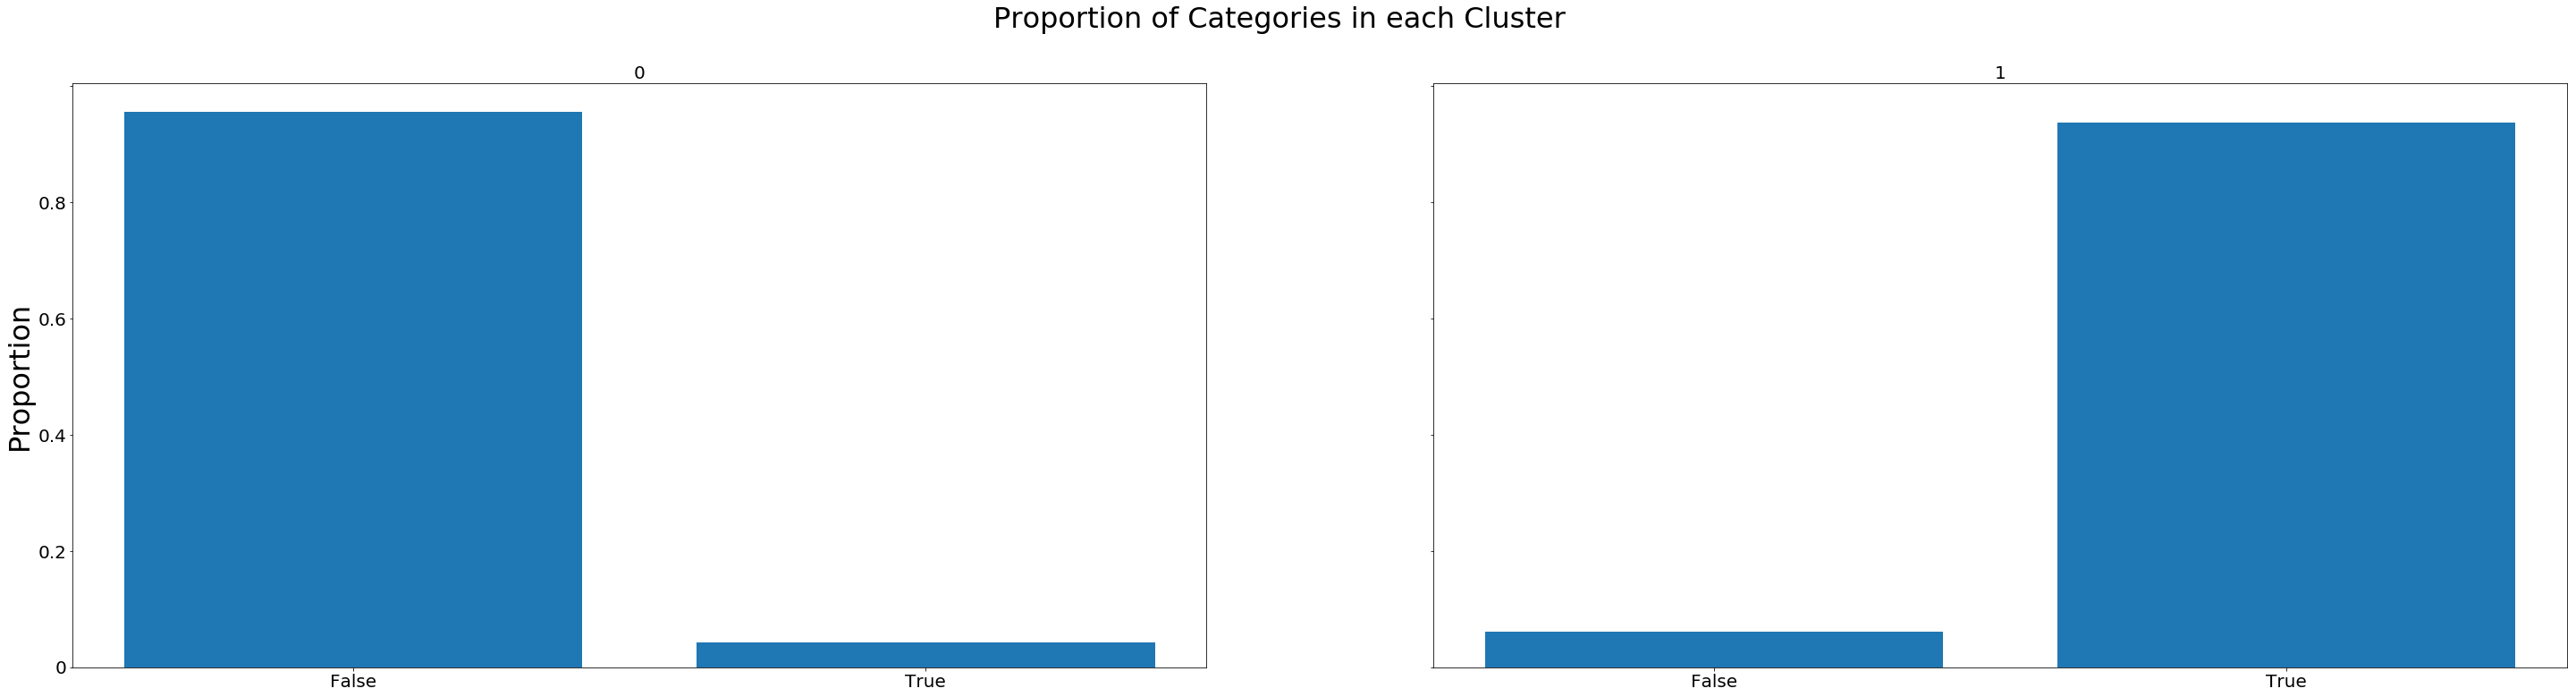

In [314]:
catPred(kmeans, y_test, preds)